## 평균 제곱 오차  Mean Squared Error (MSE)

In [1]:
import numpy as np

def MSE(y, t):
    return 0.5*np.sum((y-t)**2)

In [2]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1,0.0,0.0]
MSE(np.array(y),np.array(t))

0.09750000000000003

In [3]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
MSE(np.array(y),np.array(t))

0.5975

## 교차 엔트로피 오차 Cross Entropy Error (CEE)

In [4]:
def CEE(y,t):
    delta =  1e-7
    return -np.sum(t*np.log(y + delta))  #log 함수에 0이 들어가면 -inf가 나오기 때문에 이를 막기 위해 delta씩을 더해서 계산해준다

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1,0.0,0.0]
CEE(np.array(y),np.array(t))

0.510825457099338

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
CEE(np.array(y),np.array(t))

2.302584092994546

## 미니배치 학습 구현

In [7]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [8]:
## 10장만 랜덤으로 빼낸다.
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

#### 미니배치에서 CEE 구현

In [9]:
def CEE1(y,t):   #정답이 one-hot-encoding일때
    if y.dim ==1:
        t = t.reshape(1, t.size)
        y= y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

def CEE2(y,t):   #정답이 숫자 레이블로 주어졌을 때
    if y.dim ==1:
        t = t.reshape(1, t.size)
        y= y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size),t]))/batch_size

## 경사법을 위한 수치 미분

In [10]:
def numerical_diff(f,x):
    h = 1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

#### 수치미분 예시

In [11]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [12]:
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [13]:
numerical_diff(function_1, 5)   #analytic result 0.2

0.1999999999990898

In [14]:
numerical_diff(function_1, 10)  #analytic result 0.3

0.2999999999986347

#### 편미분

In [15]:
def function_2(x):
    return np.sum(x**2)

In [16]:
# x0 =3, x1 = 4일때 x0에 대한 편미분 구하기
def function_tmp1(x0):
    return x0*x0 + 4.0*4.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

#### 기울기 gradient

In [17]:
def numerical_gradient (f,x):
    h = 1e-4
    grad = np.zeros_like(x) #x와 형상이 같은 배열 생성
    for i in range(x.size):
        tmp_val = x[i]
        x[i] = tmp_val + h
        fxh1 = f(x)
        
        x[i] = tmp_val - h
        fxh2 = f(x)
        
        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp_val
        
    return grad

In [18]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

No handles with labels found to put in legend.


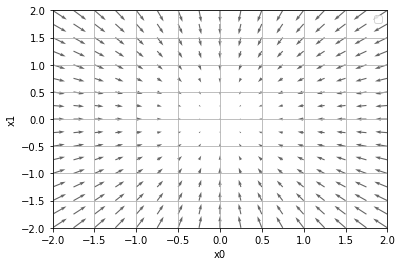

In [19]:
%run gradient_2d.py   #github file의 ch04에서 py파일 받아옴

## 경사법 gradient descent

In [20]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x

In [21]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x, lr = 0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

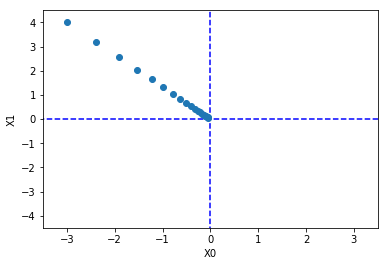

In [22]:
%run gradient_method.py  #ch04폴더에 있음

In [23]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [25]:
net = simpleNet()
print(net.W)

[[-1.26634992  0.41739645 -0.00986703]
 [-1.78064834  0.20005795 -0.57173947]]


In [27]:
x = np.array([0.6,0.9])
p = net.predict(x)
p

array([-2.36239346,  0.43049003, -0.52048574])

In [28]:
np.argmax(p)  #최대값의 인덱스

1

In [29]:
t = np.array([0,1,0])  #정답 레이블
net.loss(x,t)

0.36991253246838274

In [32]:
f = lambda w: net.loss(x,t)

dW = numerical_gradient(f, net.W)
dW

array([[ 0.02538436, -0.18552318,  0.16013882],
       [ 0.03807654, -0.27828477,  0.24020823]])

# 학습 알고리즘 구현하기

### 2층 신경망 클래스 구현하기

In [40]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) +b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        return np.sum(y==t)/float(x.shape[0])
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    #이거 구현은 다음장에서 배움 그냥 numerical_gradient 성능 개선 버젼
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [34]:
net = TwoLayerNet(784, 100, 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [41]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test,t_test) = load_mnist(normalize= True, one_hot_label = True)

train_loss_list = []

iter_num = 10000 #반복 횟수
train_size = x_train.shape[0]
batch_size = 100 #미니배치 크기
learning_rate = 0.1


network = TwoLayerNet(784, 100, 10)

for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -=learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % 100 ==0:
        print(loss)

2.2650213058324957
2.2665515689444025
2.0416443760731173
1.401883834178793
1.0027767322855694
0.863291934066857
0.7562494452836832
0.6528879592318311
0.6471241068905483
0.4442855541255188
0.45800261218047633
0.41863773605089577
0.44012203241665654
0.4962552628309305
0.420045448155663
0.3749366478083118
0.3733288370079556
0.4098374235638068
0.32627518462998095
0.37482060888413044
0.22082782396282488
0.4548131087488826
0.2449515465180714
0.28820230258600515
0.5253465781273464
0.3462618564136343
0.3677103790502872
0.35402999167080695
0.31937614463432856
0.2793389880179275
0.22872560854501867
0.16430024728006765
0.33519420798184785
0.4645879170841301
0.34900083111692687
0.3361263095082582
0.26362900931920785
0.2882111440709421
0.2409125007943632
0.1697382031784641
0.27522680801004257
0.27022362690406615
0.27606958238320245
0.29686368516880846
0.27126311629518113
0.25714118682917364
0.21383905891385008
0.39020570448359765
0.2726967148168837
0.23332112553542145
0.15161092416090644
0.19479037

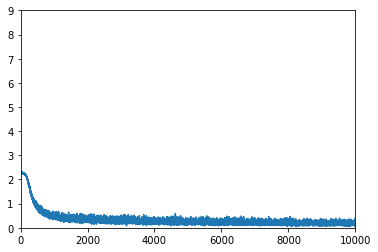

In [45]:
plt.ylim(0,9)
plt.xlim(0,10000)
plt.plot( train_loss_list)


## 시험 데이터로 평가하기

In [47]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test,t_test) = load_mnist(normalize= True, one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list=[]

iter_num = 10000 #반복 횟수
train_size = x_train.shape[0]
batch_size = 100 #미니배치 크기
learning_rate = 0.1

iter_per_epoch = max(train_size / batch_size, 1)  #1에폭당 반복 수

network = TwoLayerNet(784, 100, 10)

for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -=learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch ==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : " + str(train_acc)+", "+str(test_acc))

train acc, test acc : 0.09736666666666667, 0.0982
train acc, test acc : 0.81055, 0.8167
train acc, test acc : 0.88465, 0.888
train acc, test acc : 0.9001666666666667, 0.9041
train acc, test acc : 0.9068333333333334, 0.91
train acc, test acc : 0.9128166666666667, 0.9165
train acc, test acc : 0.9184, 0.9212
train acc, test acc : 0.9222166666666667, 0.9248
train acc, test acc : 0.9262666666666667, 0.9289
train acc, test acc : 0.92925, 0.9312
train acc, test acc : 0.93075, 0.9326
train acc, test acc : 0.9340333333333334, 0.9353
train acc, test acc : 0.9372666666666667, 0.9376
train acc, test acc : 0.93985, 0.9394
train acc, test acc : 0.9422166666666667, 0.9406
train acc, test acc : 0.9442, 0.9429
train acc, test acc : 0.9461666666666667, 0.9458


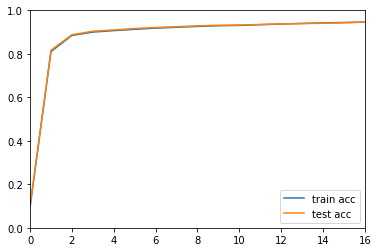

In [51]:
plt.ylim(0,1)
plt.xlim(0,16)
plt.plot(train_acc_list, label = 'train acc')
plt.plot(test_acc_list, label = 'test acc')
plt.legend(loc = 'lower right')